In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
tf.keras.utils.set_random_seed(812)

In [2]:
# Data import, cleaning

# Taken in part from https://keras.io/examples/vision/mnist_convnet/ and
# https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
input_shape = (28, 28, 1)
print(x_train.shape[0])

# Reshape data appropriately and scale to [0, 1] range
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 0s 0us/step
60000


In [10]:
# Making and training model taken from: https://keras.io/examples/vision/mnist_convnet/
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(6, (5, 5), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(12, (5, 5), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Test loss: 0.07608013600111008
Test accuracy: 0.9775999784469604


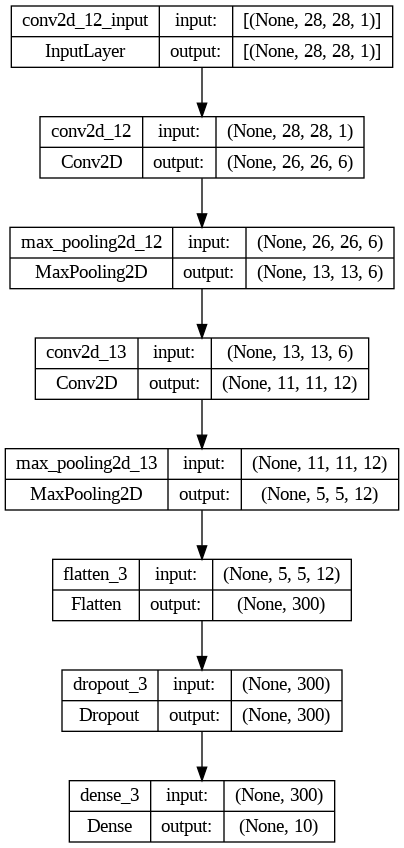

In [12]:
# Evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Print shape of model for use in report
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

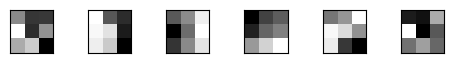

In [25]:
# Plotting of fitlers taken in part from https://github.com/keras-team/keras/issues/6098
# and this YouTube video https://www.youtube.com/watch?v=ho6JXE3EbZ8
filters, biases = model.layers[0].get_weights()
filters = filters.T

fig = plt.figure()
for j in range(len(filters)):
    ax = fig.add_subplot(8, 8, j+1)
    ax.matshow(filters[j][0], cmap="binary")

    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout()


In [14]:
# Truncated model with only convolutional layers for modelling purposes
conv_layer_index = [0, 2]

outputs = [model.layers[i].output for i in conv_layer_index]
model_short = tf.keras.Model(inputs = model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12_input (InputLaye  [(None, 28, 28, 1)]       0         
 r)                                                              
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 12)        660       
                                                                 
Total params: 720 (2.81 KB)
Trainable params: 720 (2.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


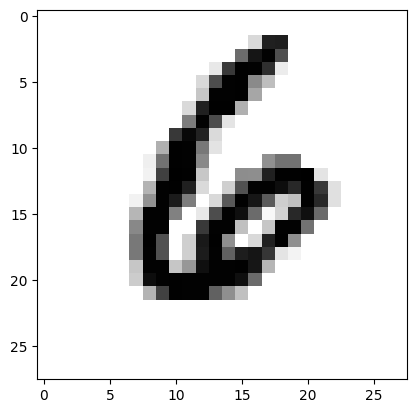

In [37]:
# Use to print sample input for use in report
from keras.preprocessing.image import load_img, img_to_array
example_img = x_train[13]
plt.imshow(example_img, cmap="binary")
example_img = img_to_array(example_img)
example_img = np.expand_dims(example_img, axis=0)

In [39]:
# Predict output on sample input
feature_output = model_short.predict(example_img)

1/1 [==============================] - 0s 18ms/step


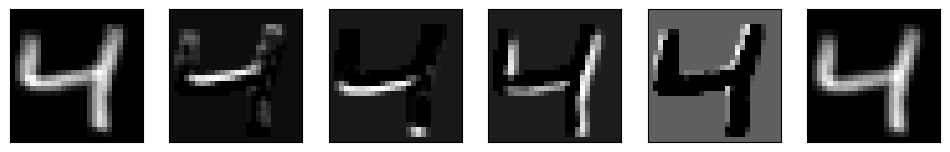

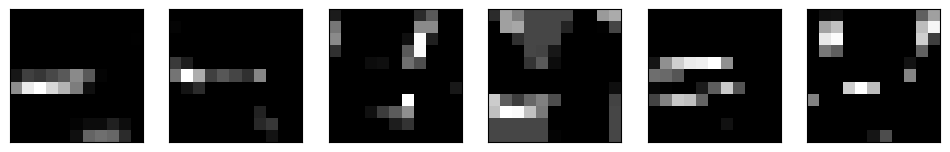

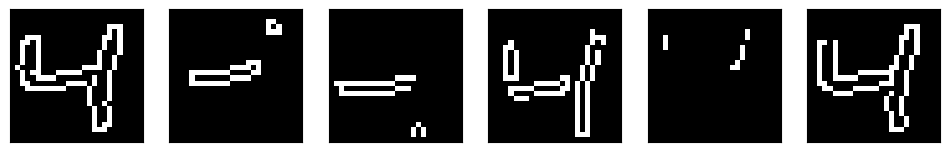

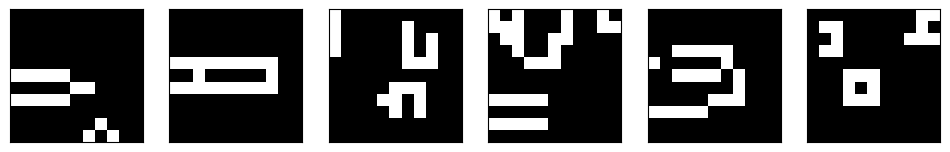

In [24]:
# Plot first and second hidden layer activation on sample input, and edges
# detected on first hideen layer activation via Canny edge detection
import cv2 as cv
col = 6
row = 1
for ftr in feature_output:
  fig=plt.figure(figsize=(12, 12))
  for i in range(1, col*row + 1):
    fig = plt.subplot(row, col, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, i-1], cmap="gray")

  plt.show()

for ftr in feature_output:
  fig=plt.figure(figsize=(12, 12))
  for i in range(1, col*row + 1):
    fig = plt.subplot(row, col, i)
    fig.set_xticks([])
    fig.set_yticks([])
    edge_array = np.array(ftr[0, :, :, i-1])
    edge_array = edge_array*255/16
    edge_array = edge_array.astype('uint8')
    edges = cv.Canny(edge_array, 30, 40)
    plt.imshow(edges, cmap="gray")
  plt.show()
